# Linear discriminant analysis
Supervised data compression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd

#Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target

# Create DataFrame with features
df = pd.DataFrame(X)
df.columns = dataObj.feature_names

# Add class column
df.insert(loc=0, column="Class", value=y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Method 1: Using NumPy

### Calculate the mean vectors $\mu_i$ for each class ($i$)

In [2]:
mvs = []

for label in np.unique(y):
    mv = np.mean(X_train_std[y_train == label, :], axis=0)
    mvs.append(mv)
    #mv_print = ", ".join(f"{i:5.2f}" for i in mv)
    #print(f"Label={label}, MV:{mv_print}")

df = pd.DataFrame(mvs)
df.index.name = 'Label'
display(df)

NameError: name 'mus' is not defined

### Compute the within-class scatter matrix
Not used because classes are not equally distributed:

In [5]:
d = X_train_std.shape[1]

# Within-class scatter matrix
S_W_temp = np.zeros((d, d))

for label, mv in zip(np.unique(y), mvs):
    # Individual scatter matrix for each class
    S_i = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row = row.reshape(d,1)
        mv = mv.reshape(d,1)
        rmmv = row - mv
        # Outer product
        S_i +=  rmmv @ rmmv.T
    S_W_temp += S_i

In [6]:
df = pd.DataFrame(S_W_temp)
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Compute the "scaled" within-class scatter matrix
This is essentially covariance matrix


In [7]:
d = X_train_std.shape[1]

# Scaled within-class scatter matrix
S_W = np.zeros((d, d))

for label in np.unique(y):
    S_i = np.cov(X_train_std[y_train == label], rowvar=False)
    S_W += S_i

df = pd.DataFrame(S_W)
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.245832,0.051385,-0.032946,-0.089533,0.115463,0.245386,0.150110,-0.055687,0.099079,0.487858,0.023763,-0.006972,0.134211
1,0.051385,2.154697,0.224341,0.354339,-0.196603,0.036054,-0.005403,0.340167,0.168398,-0.167482,-0.357550,0.177277,-0.254172
2,-0.032946,0.224341,2.525035,1.458130,0.370291,0.336648,0.238744,0.471352,0.030912,-0.056416,0.128417,0.234080,-0.106648
3,-0.089533,0.354339,1.458130,1.980524,0.081397,0.117952,0.125216,0.327635,-0.037325,-0.129452,0.061622,0.255452,-0.129087
4,0.115463,-0.196603,0.370291,0.081397,2.704772,0.160415,0.149802,-0.736919,0.598469,0.076183,0.118491,-0.113417,0.317966
5,0.245386,0.036054,0.336648,0.117952,0.160415,1.297619,0.615561,-0.116308,0.721829,0.304018,0.007153,0.361148,0.159978
6,0.150110,-0.005403,0.238744,0.125216,0.149802,0.615561,0.622380,-0.345311,0.598214,0.260335,0.002007,0.167815,0.049200
7,-0.055687,0.340167,0.471352,0.327635,-0.736919,-0.116308,-0.345311,2.205761,-0.179296,-0.028542,0.119312,-0.109606,-0.082535
8,0.099079,0.168398,0.030912,-0.037325,0.598469,0.721829,0.598214,-0.179296,2.107296,0.506807,-0.124926,0.181378,0.269049
9,0.487858,-0.167482,-0.056416,-0.129452,0.076183,0.304018,0.260335,-0.028542,0.506807,1.396840,-0.285939,-0.153587,0.292842


### Compute the between-class scatter matrix

In [8]:
d = X_train_std.shape[1] # number of features

# Mean overall (actually this will give all zeros becuase data is already standardized.)
mva = np.mean(X_train_std, axis=0).reshape(d,1) # make column vector

S_B = np.zeros((d, d))
for label, mv in zip(np.unique(y), mvs):
    # Count number of obervation in each class
    n = X_train[y_train == label, :].shape[0]
    # Mean values for each class
    mv = mv.reshape(d, 1)  # make column vector
    mmm = mv - mva
    # Outer product
    S_B += n * mmm @ mmm.T

df = pd.DataFrame(S_B)
display(df)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Computer eigenvalues and eigenvectors
Solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$:

In [9]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [10]:
# Print the real parts of the eigenvalues
eigen_vals.real

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Sort eigenvectors in decreasing order of the eigenvalues

In [11]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(eigen_vals[i].real, eigen_vecs.real[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

df = pd.DataFrame(eigen_pairs)
df.index.name = "Order"
df.columns = ["Eigenvalues","Eigenvectors"]
display(df)

,Eigenvalues,Eigenvectors
Order,,
0,0.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
5,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
6,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
7,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
8,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."


### Visualizing "discriminability"

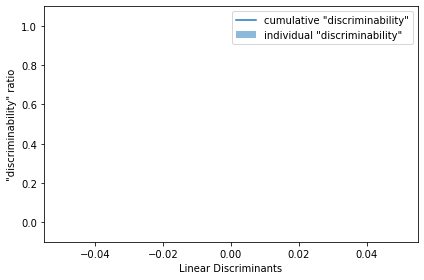

In [12]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/lda1.png', dpi=300)
plt.show()

### Transformation matrix, W

In [13]:
w1 = eigen_pairs[0][1]
w2 = eigen_pairs[1][1]
w = np.stack((w1,w2),axis=1)
print('Matrix W:\n', w)

Matrix W:
 [[1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


### Projecting samples onto the new feature space

In [14]:
X_train_lda = X_train_std.dot(w)

### Visualizing training data

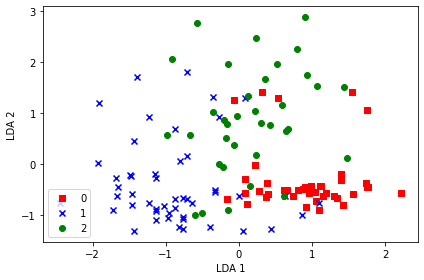

In [15]:
from PlotFunction3 import plot_reduced_dim
plot_reduced_dim(X_train_lda, y_train, "LDA")

## Method 2: SKL

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_train_lda = lda.fit_transform(X_train_std, y_train)
lda.explained_variance_ratio_

array([0.73846314, 0.26153686])

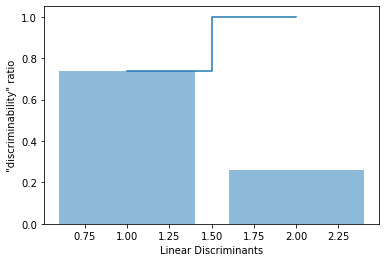

In [17]:
plt.bar(range(1, 3), lda.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 3), np.cumsum(lda.explained_variance_ratio_), where='mid')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.show()

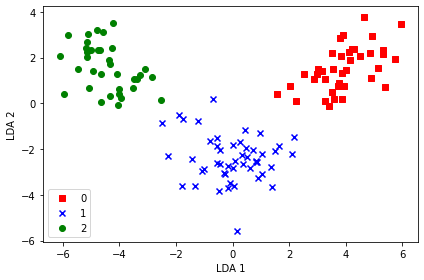

In [18]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

plot_reduced_dim(X_train_lda, y_train, "LDA")

## Training with logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

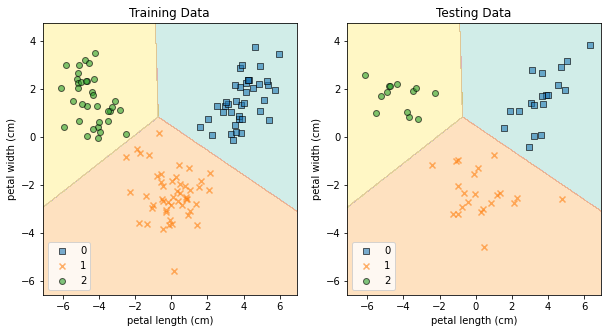

In [20]:
from PlotFunction2 import plot_decision_surface2

plot_decision_surface2(X_train_lda, X_test_lda, y_train, y_test, lr)